### Zillow Sales City - Cumulative

In [38]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import numpy as np

In [39]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [40]:
geo = gpd.read_file('data/shapefiles/Zil_City_Reg.geojson')
geo.head()

,GEOID10,zip_id,Z_city,Z_state,Z_city_state,geometry
0,11563,11563.0,Lynbrook,NY,Lynbrook_NY,"MULTIPOLYGON (((-73.69078 40.65058, -73.69040 ..."
1,11560,11560.0,Locust Valley,NY,Locust Valley_NY,"MULTIPOLYGON (((-73.62102 40.89851, -73.61929 ..."
2,10701,10701.0,Yonkers,NY,Yonkers_NY,"MULTIPOLYGON (((-73.91127 40.91621, -73.91113 ..."
3,08512,8512.0,Cranbury Township,NJ,Cranbury Township_NJ,"MULTIPOLYGON (((-74.56841 40.28678, -74.56753 ..."
4,08742,8742.0,Point Pleasant,NJ,Point Pleasant_NJ,"MULTIPOLYGON (((-74.09518 40.09370, -74.09458 ..."


In [41]:
df = pd.read_csv('data/Zil_Sale_CityTot.csv')

In [42]:
df.head()

,id,Tot_19,Tot_20,Tot_Ch,Tot_PCh
0,Amityville_NY,318.999987,298.00000,-20.999987,-0.065831
1,Avon_CT,397.833340,518.66666,120.833320,0.303728
2,Babylon_NY,238.499990,227.83333,-10.666660,-0.044724
3,Baldwin_NY,404.000017,313.66668,-90.333337,-0.223597
4,Barnegat Township_NJ,886.833333,848.33338,-38.499953,-0.043413


In [43]:
dates = df.columns.tolist()[1:]

In [44]:
cities = pd.merge(geo,df,how='left',left_on='Z_city_state',right_on='id')

In [45]:
cities = cities.drop(columns=['GEOID10', 'zip_id', 'Z_city_state','Z_city','Z_state'])
#cities.head()

In [46]:
cities = pd.melt(cities,id_vars=['id','geometry'],value_vars=dates)
cities.head()

,id,geometry,variable,value
0,NaN,"MULTIPOLYGON (((-73.69078 40.65058, -73.69040 ...",Tot_19,NaN
1,NaN,"MULTIPOLYGON (((-73.62102 40.89851, -73.61929 ...",Tot_19,NaN
2,Yonkers_NY,"MULTIPOLYGON (((-73.91127 40.91621, -73.91113 ...",Tot_19,901.333333
3,NaN,"MULTIPOLYGON (((-74.56841 40.28678, -74.56753 ...",Tot_19,NaN
4,Point Pleasant_NJ,"MULTIPOLYGON (((-74.09518 40.09370, -74.09458 ...",Tot_19,589.666660


In [47]:
#keep as many geos as possible and replace nans
cities.value = cities.value.fillna(0)

In [48]:
cities.variable.unique()

array(['Tot_19', 'Tot_20', 'Tot_Ch', 'Tot_PCh'], dtype=object)

In [49]:
cities.describe()

,value
count,2828.000000
mean,131.501838
std,612.104374
min,-3736.333000
25%,0.000000
50%,0.000000
75%,17.708324
max,16023.333330


### Total Sales in 2019 and 2020

In [50]:
annual = ['Tot_19','Tot_20']

In [51]:
def annual_maps(gdf,year):
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    new_norm = plt.Normalize(vmin=0,vmax=2000)
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
    sm.set_array([])
    fig.colorbar(sm)
    gdf.plot(column = 'value', cmap='Blues', norm=new_norm, edgecolor="face", linewidth=0.4, ax = ax)
    ax.set_title(f'Total Sales 20{year[-2:]}', color = 'k',  fontsize = 15)
   #             xy = (0.6,.05), xycoords = 'figure fraction', fontsize = 11, color = 'k')
    plt.savefig(f'Zillow/City_Sales/{year}.jpg', dpi = 400) # saving each scatter plot by month

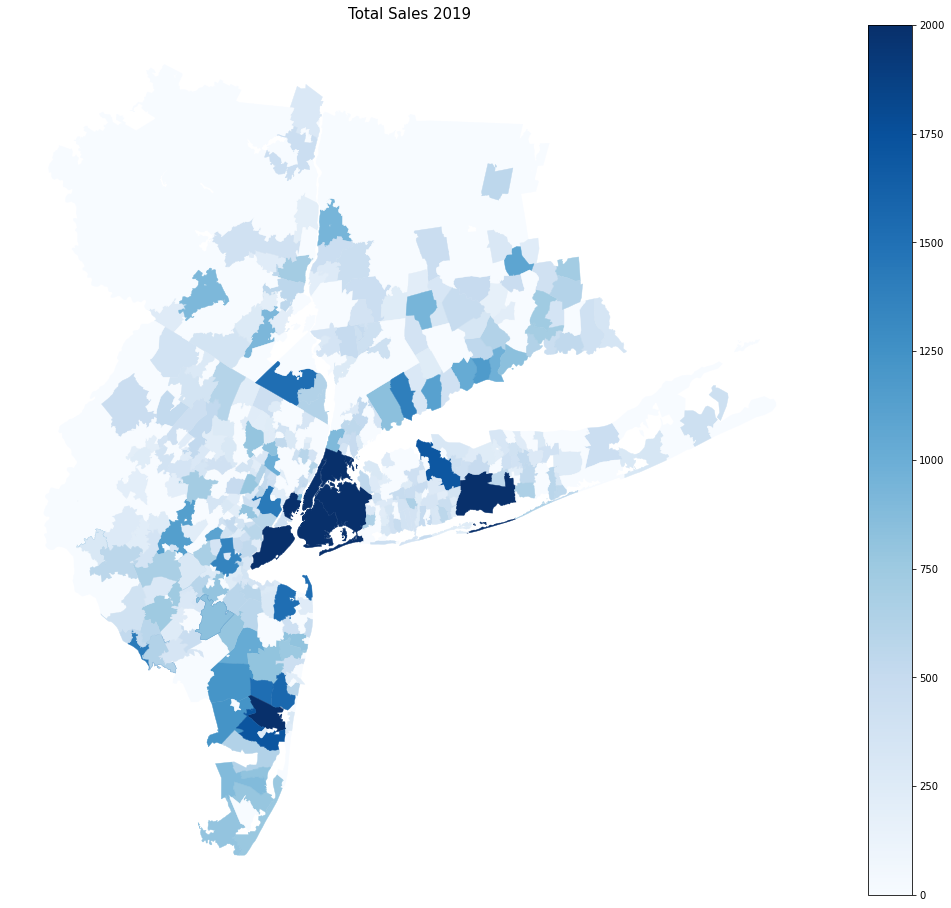

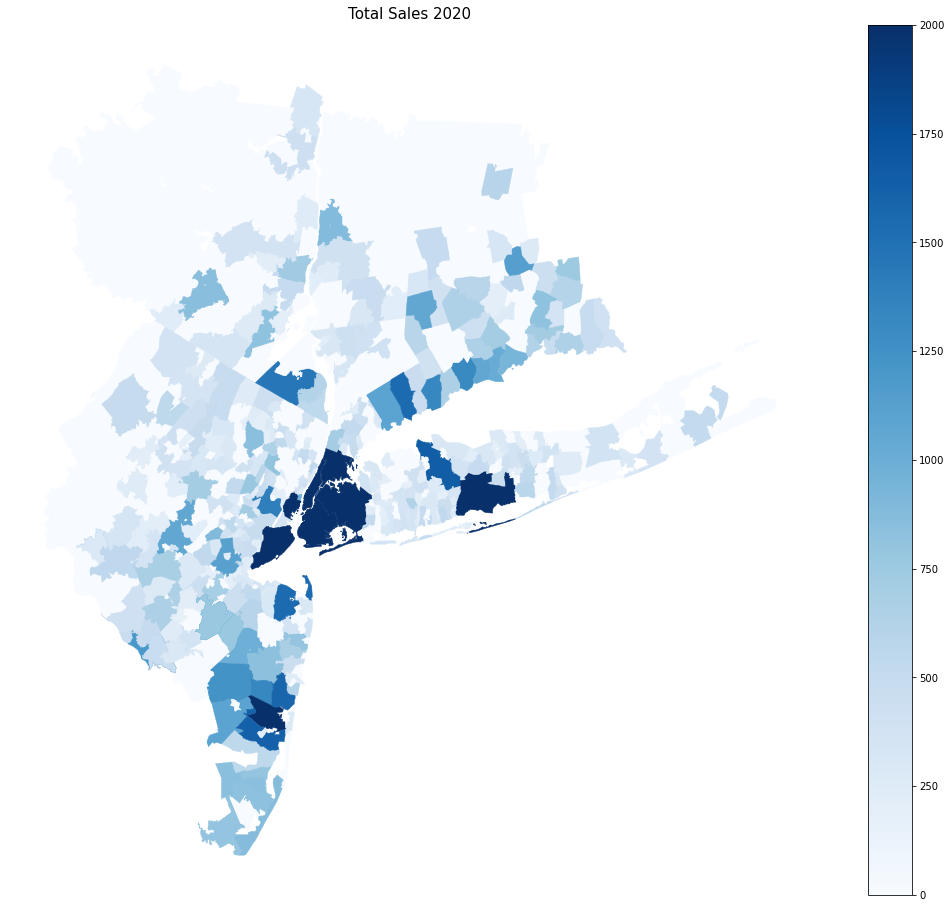

In [52]:
for a in annual:
    gdf = cities[cities['variable'].isin([a])]
    annual_maps(gdf,a)

### Percent Change Cumulative

In [53]:
def pct_map(gdf):
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    divnorm = mpl.colors.TwoSlopeNorm(vmin= -0.5, vcenter = 0,vmax = 0.5)
    sm = plt.cm.ScalarMappable(cmap='RdBu', norm=divnorm)
    sm.set_array([])
    gdf.plot(column = 'value', cmap = 'RdBu', edgecolor="face", norm = divnorm, linewidth=0.4, ax = ax)
    fig.colorbar(sm)
    ax.set_title(f'% Change in Total Sales', color = 'k',  fontsize = 15)
    #             xy = (0.6,.05), xycoords = 'figure fraction', fontsize = 11, color = 'k')
    plt.savefig(f'Zillow/City_Sales/PctCh.jpg', dpi = 400) # saving each scatter plot by month

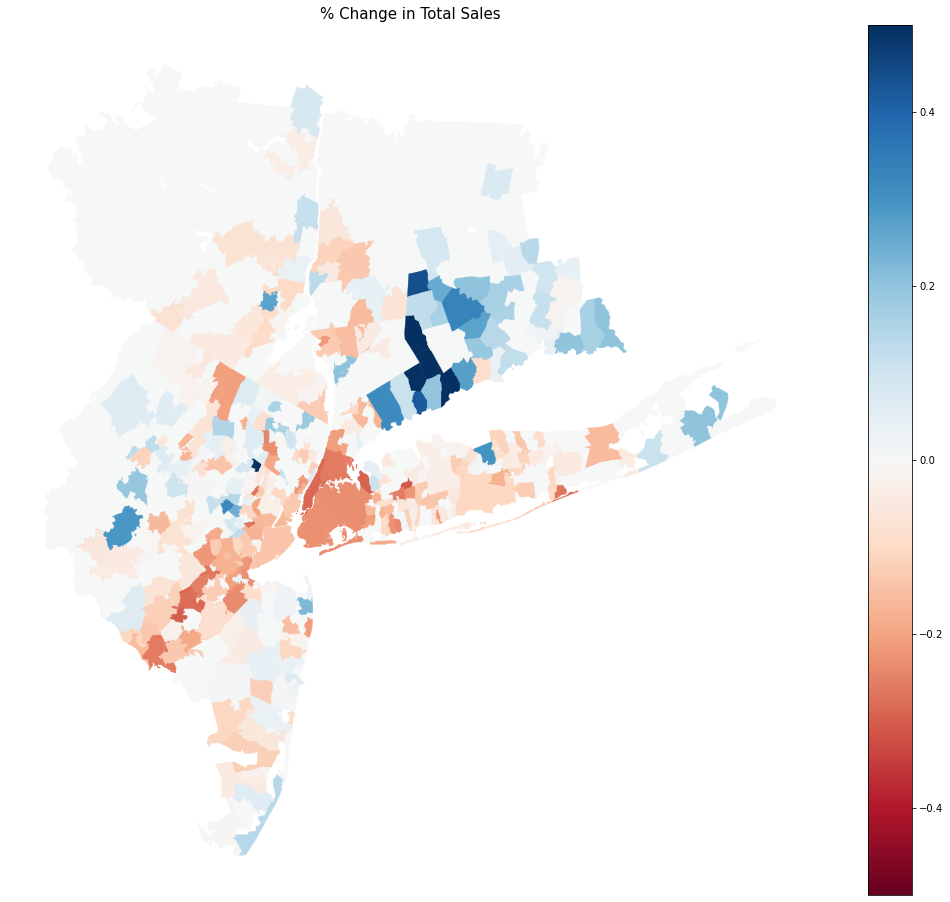

In [54]:
gdf = cities[cities['variable']=='Tot_PCh']
pct_map(gdf)

### Total Change in Sales

In [55]:
def ch_map(gdf):
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    divnorm = mpl.colors.TwoSlopeNorm(vmin= -250, vcenter = 0,vmax = 250)
    sm = plt.cm.ScalarMappable(cmap='RdBu', norm=divnorm)
    sm.set_array([])
    gdf.plot(column = 'value', cmap = 'RdBu', edgecolor="face", norm = divnorm, linewidth=0.4, ax = ax)
    fig.colorbar(sm)
    ax.set_title(f'Change in Total Sales', color = 'k',  fontsize = 15)
    #             xy = (0.6,.05), xycoords = 'figure fraction', fontsize = 11, color = 'k')
    plt.savefig(f'Zillow/City_Sales/TotCh.jpg', dpi = 400) # saving each scatter plot by month

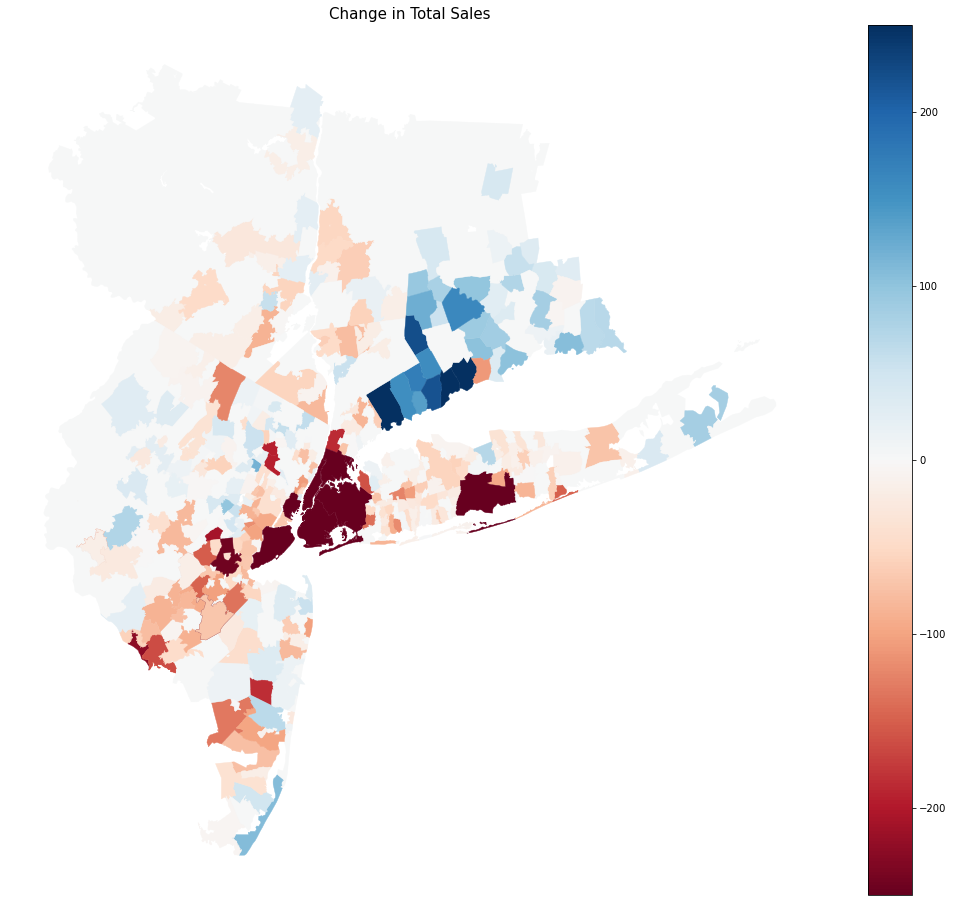

In [56]:
gdf = cities[cities['variable']=='Tot_Ch']
ch_map(gdf)